## 🚀 Importing the Dependencies

In [38]:
# Core data and analysis tools
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, spearmanr

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df = pd.read_csv("sleep_health.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 🧹 Data Cleaning

This section covers the steps taken to clean and preprocess the dataset, including handling duplicates, missing values, and preparing variables for analysis.

In [40]:
# Checking for duplicates
df.duplicated().sum()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic stats
df.describe()

Missing values:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### 🔄 Handling Missing Values

Changing the `NaN` values to `None` for better compatibility and clarity in further analysis.

In [41]:
# Example: Replace NaN with None in the 'Sleep Disorder' column
df['Sleep Disorder'] = df['Sleep Disorder'].where(pd.notna(df['Sleep Disorder']), None)

df['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

### 🧮 Function to Check the Strength of the Correlation Test

This function helps interpret the strength and direction of a correlation coefficient, making your statistical analysis more insightful! 📊

In [42]:
def get_strength(corr):
    if corr <= -0.7:
        return "STRONG NEGATIVE"
    elif corr <= -0.3:
        return "MODERATE NEGATIVE"
    elif corr < 0:
        return "WEAK NEGATIVE"
    elif corr < 0.3:
        return "WEAK"
    elif corr < 0.7:
        return "MODERATE"
    else:
        return "STRONG"

### 📊 Chi-Square Test Results: Gender vs Sleep Disorder

- 🧑‍🤝‍🧑 **Contingency Table:** Shows the distribution of sleep disorders by gender.
- 🧮 **Chi-square Statistic:** 24.91
- 🎲 **Degrees of Freedom:** 1
- 📉 **p-value:** 0.0000

**Interpretation:**  
A very low p-value (p < 0.001) indicates a statistically significant association between gender and sleep disorder type in this dataset.

In [43]:
contingency_table = pd.crosstab(df['Gender'], df['Sleep Disorder'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Degrees of freedom = {dof}")
print(f"Chi-square statistic: {chi2:.2f}, p-value:{p:.4f}")

Degrees of freedom = 1
Chi-square statistic: 24.91, p-value:0.0000


In [44]:
cross_tab = pd.crosstab(df['Gender'], df['Sleep Disorder'])

print (cross_tab)

Sleep Disorder  Insomnia  Sleep Apnea
Gender                               
Female                36           67
Male                  41           11


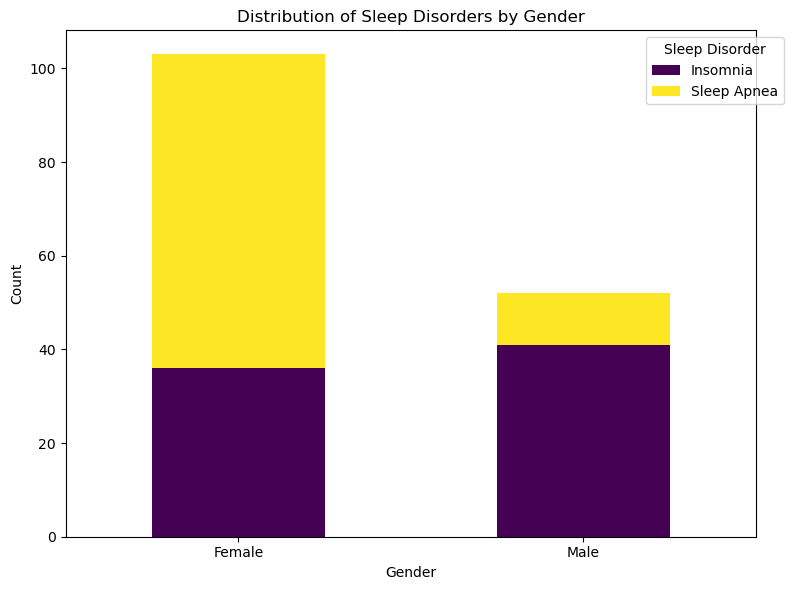

In [45]:
cross_tab.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='viridis'
)
plt.title('Distribution of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 📊 Visualizing Sleep Disorders by BMI Category

The next cell creates a bar plot to show how sleep disorders are distributed across different BMI categories. This helps to quickly compare the prevalence of each sleep disorder within each BMI group.

In [46]:
chi2, p, dof, expected = chi2_contingency(cross_tab)

occupation_table = pd.crosstab(df['Occupation'], df['Sleep Disorder'])
bmi_table = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])

cross_tab2 = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
print (cross_tab2)

Sleep Disorder  Insomnia  Sleep Apnea
BMI Category                         
Normal                 7            5
Normal Weight          2            2
Obese                  4            6
Overweight            64           65


In [47]:
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(bmi_table)
print(f"BMI Category vs Sleep Disorder:\nChi2 = {chi2_bmi:.2f}, p = {p_bmi:.4f}")

BMI Category vs Sleep Disorder:
Chi2 = 0.73, p = 0.8650


In [48]:
res_bmi = (bmi_table - expected_bmi) / np.sqrt(expected_bmi)
print("Standard Residuals:")
print(res_bmi.round(2))

Standard Residuals:
Sleep Disorder  Insomnia  Sleep Apnea
BMI Category                         
Normal              0.43        -0.42
Normal Weight       0.01        -0.01
Obese              -0.43         0.43
Overweight         -0.01         0.01


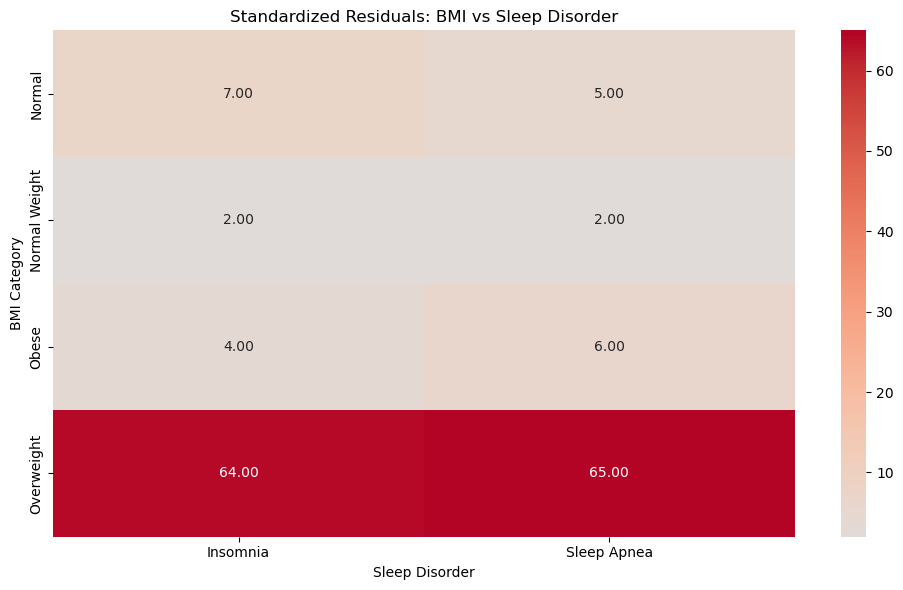

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab2, annot=True, center=0, cmap="coolwarm", fmt=".2f")
plt.title("Standardized Residuals: BMI vs Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("BMI Category")
plt.tight_layout()
plt.show()

	Overweight extremely over-represented—this group drives the association


#### 🔎 Interpreting Standardized Residuals

- **Residual > 2:**  
    Observed count is much higher than expected.  
    → This group may be **more prone** to the sleep disorder.

- **Residual < -2:**  
    Observed count is much lower than expected.  
    → This group may be **protected** against the sleep disorder.

**Examples:**
- If the **Obese** category has a high positive residual for **Sleep Apnea**, it suggests a strong association between obesity and sleep apnea.
- If the **Normal BMI** group has a high positive residual for **No Disorder**, it suggests they are less likely to have a sleep disorder.

In [50]:
subset = df[['Quality of Sleep', 'Stress Level']].dropna()
pearson_corr, pearson_p = pearsonr(subset['Quality of Sleep'], subset['Stress Level'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_p:.4f}")

#monotonic relationship
spearman_corr, spearman_p = spearmanr(subset['Quality of Sleep'], subset['Stress Level'])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_p:.4f}")

Pearson Correlation: -0.90, p-value: 0.0000
Spearman Correlation: -0.91, p-value: 0.0000


In [51]:
cross_tab3 = pd.crosstab(df['Quality of Sleep'], df['Stress Level'])

print (cross_tab3)

Stress Level       3   4   5   6   7   8
Quality of Sleep                        
4                  0   0   0   0   0   5
5                  0   0   0   0   7   0
6                  0   0   0   4  36  65
7                  0  25   7  38   7   0
8                  2  43  60   4   0   0
9                 69   2   0   0   0   0


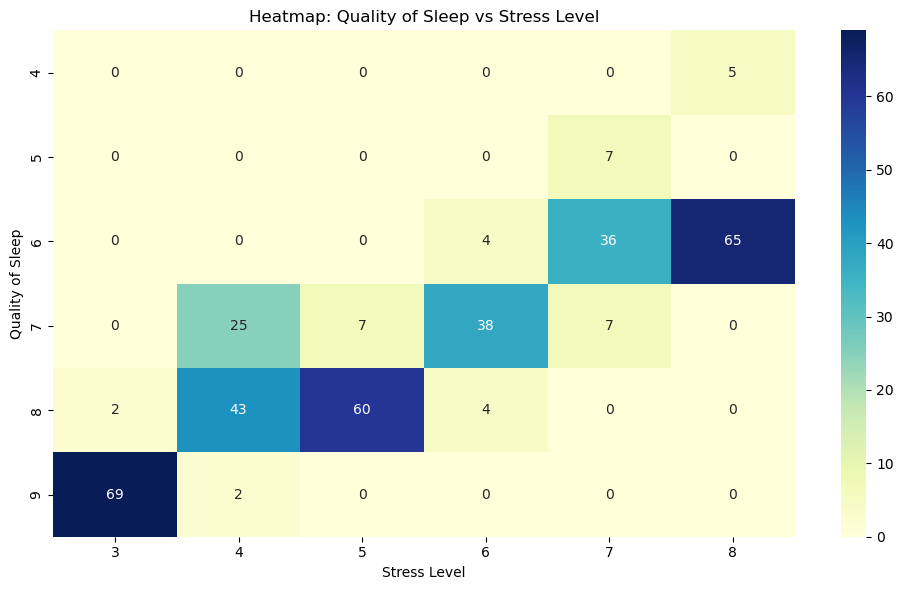

In [52]:
#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Quality of Sleep vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.tight_layout()
plt.show()

In [53]:
# Check the number of males
df["Gender"].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64